<a href="https://colab.research.google.com/github/mbasant330/datascience/blob/main/tsf22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
%cd drive/My Drive/Time Series Forecasting using Python

/content/drive/My Drive/Time Series Forecasting using Python


In [ ]:
import pandas as pd

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
from datetime import datetime

In [ ]:
from pandas import Series

In [ ]:
import warnings

In [ ]:
warnings.filterwarnings("ignore")

In [ ]:
train=pd.read_csv("Train_SU63ISt.csv")
test=pd.read_csv("Test_0qrQsBZ.csv")

In [ ]:
train_original=train.copy()
test_original=test.copy()

In [ ]:
train.columns,test.columns

(Index(['ID', 'Datetime', 'Count'], dtype='object'),
 Index(['ID', 'Datetime'], dtype='object'))

In [ ]:
train.dtypes,test.dtypes

(ID           int64
 Datetime    object
 Count        int64
 dtype: object, ID           int64
 Datetime    object
 dtype: object)

In [ ]:
train.shape,test.shape

((18288, 3), (5112, 2))

In [ ]:
train['Datetime']=pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M')

In [ ]:
test['Datetime']=pd.to_datetime(test.Datetime,format='%d-%m-%Y %H:%M')
test_original['Datetime']=pd.to_datetime(test_original.Datetime,format='%d-%m-%Y %H:%M')
train_original['Datetime']=pd.to_datetime(train_original.Datetime, format='%d-%m-%Y %H:%M')

In [ ]:
for i in (train, test, test_original, train_original):
    i['year']=i.Datetime.dt.year
    i['month']=i.Datetime.dt.month
    i['day']=i.Datetime.dt.day
    i['Hour']=i.Datetime.dt.hour

In [ ]:
train['day of week']=train['Datetime'].dt.dayofweek
temp=train['Datetime']

In [ ]:
def applyer(row):
  if row.dayofweek == 5 or row.dayofweek == 6:
    return 1
  else :
    return 0
temp2 = train['Datetime'].apply(applyer)
train['weekend']=temp2

In [ ]:
train.index=train['Datetime']

In [ ]:
df=train.drop('ID',1)


In [ ]:
ts = df['Count']

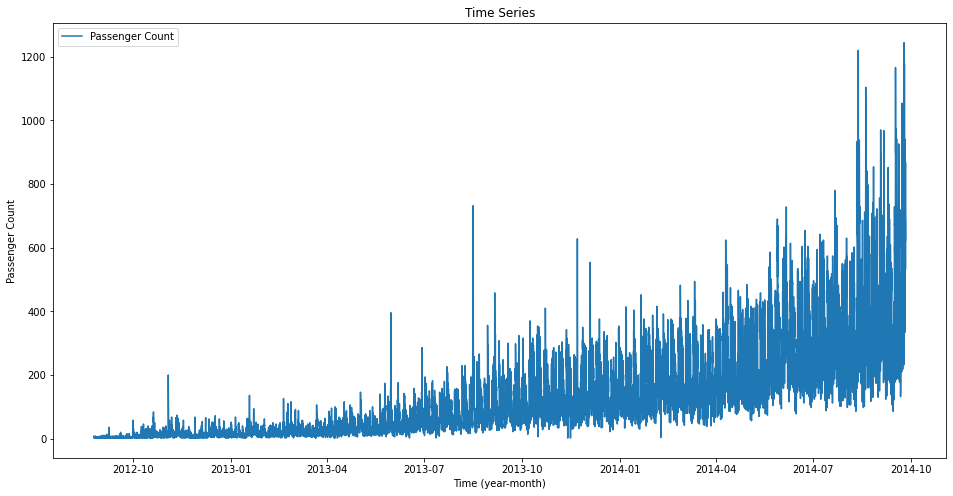

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(ts,label='Passenger Count')
plt.title('Time Series')
plt.xlabel('Time (year-month)')
plt.ylabel('Passenger Count')
plt.legend(loc='best')

<AxesSubplot:xlabel='year'>

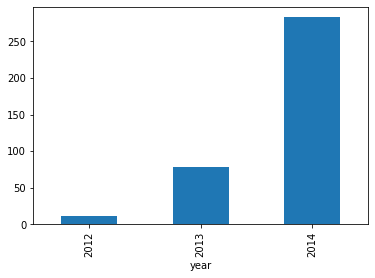

In [ ]:
train.groupby('year')['Count'].mean().plot.bar()

<AxesSubplot:xlabel='month'>

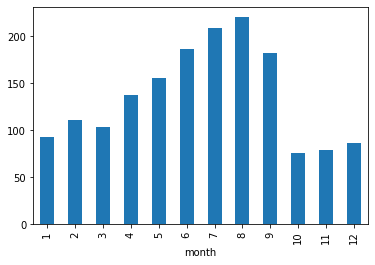

In [ ]:
train.groupby('month')['Count'].mean().plot.bar()

<AxesSubplot:title={'center':'Passanger Count(Monthwise)'}, xlabel='year,month'>

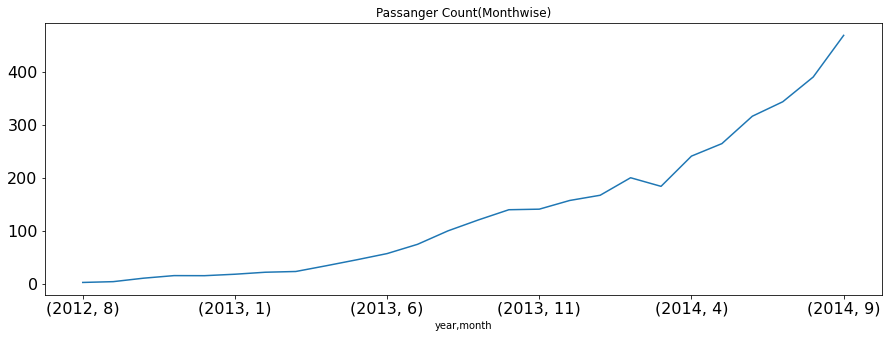

In [ ]:
temp=train.groupby(['year','month'])['Count'].mean()
temp.plot(figsize=(15,5),title='Passanger Count(Monthwise)',fontsize=16)

<AxesSubplot:xlabel='day'>

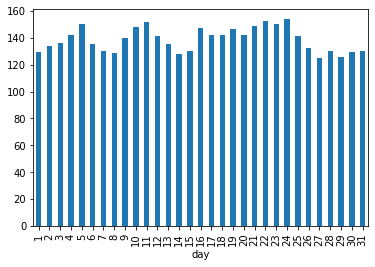

In [ ]:
train.groupby('day')['Count'].mean().plot.bar()

<AxesSubplot:xlabel='Hour'>

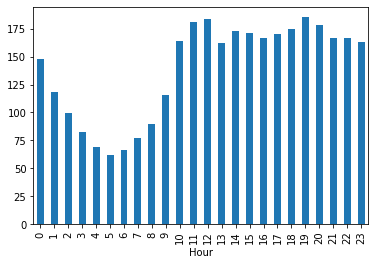

In [ ]:
train.groupby('Hour')['Count'].mean().plot.bar()

<AxesSubplot:xlabel='weekend'>

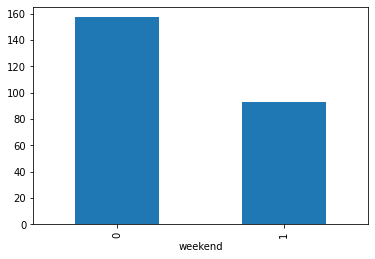

In [ ]:
train.groupby('weekend')['Count'].mean().plot.bar()

<AxesSubplot:xlabel='day of week'>

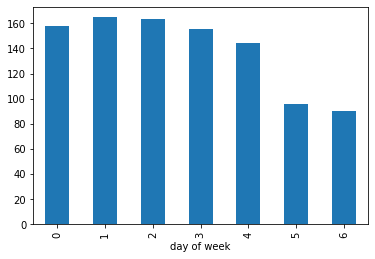

In [ ]:
train.groupby('day of week')['Count'].mean().plot.bar()

In [ ]:
train=train.drop('ID',1)

In [ ]:
train.Timestamp =pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M')
train.index =train.Timestamp
hourly=train.resample('H').mean()
daily=train.resample('D').mean()
weekly=train.resample('W').mean()
monthly=train.resample('M').mean()

<AxesSubplot:title={'center':'Monthly'}, xlabel='Datetime'>

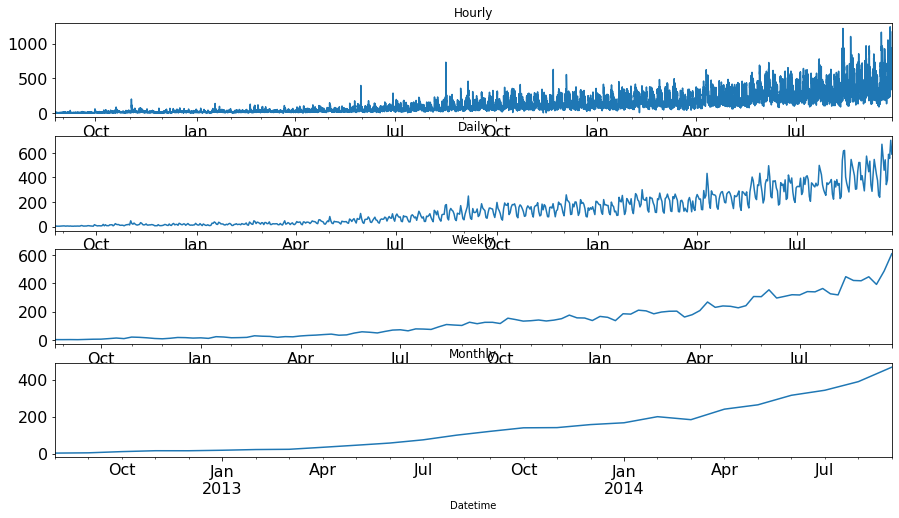

In [ ]:
fig,axs=plt.subplots(4,1)
hourly.Count.plot(figsize=(15,8),title='Hourly',fontsize=16,ax=axs[0]) 
daily.Count.plot(figsize=(15,8),title='Daily',fontsize=16,ax=axs[1])
weekly.Count.plot(figsize=(15,8),title='Weekly',fontsize=16,ax=axs[2])
monthly.Count.plot(figsize=(15,8),title='Monthly',fontsize=16,ax=axs[3])

In [ ]:
test.Timestamp =pd.to_datetime(test.Datetime,format='%d-%m-%Y %H:%M')
test.index =test.Timestamp
test=test.resample('D').mean()

In [ ]:
train.Timestamp =pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M')
train.index =train.Timestamp
train=train.resample('D').mean()

In [ ]:
Train = train.loc['2012-08-25':'2014-06-24'] 
valid=train.loc['2014-06-25':'2014-09-25']

<AxesSubplot:title={'center':'Daily Ridership'}, xlabel='Datetime'>

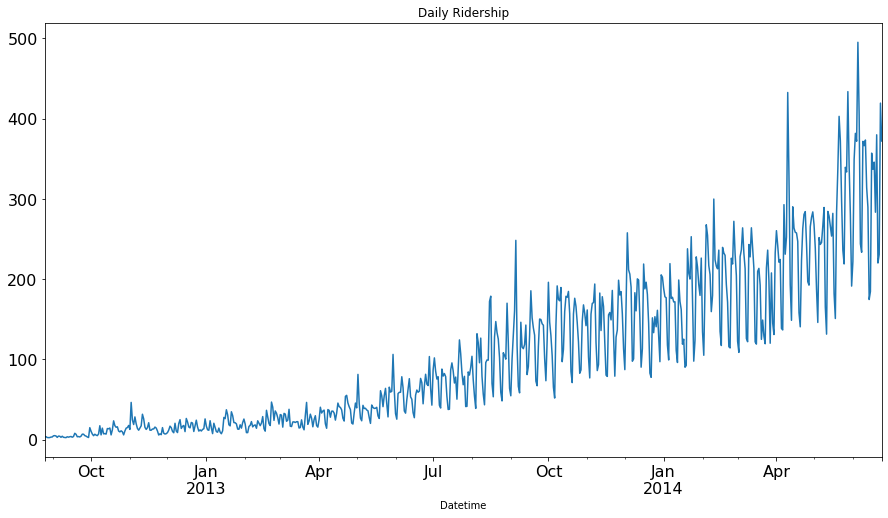

In [ ]:
Train.Count.plot(figsize=(15,8),title='Daily Ridership', label='train',fontsize=16)

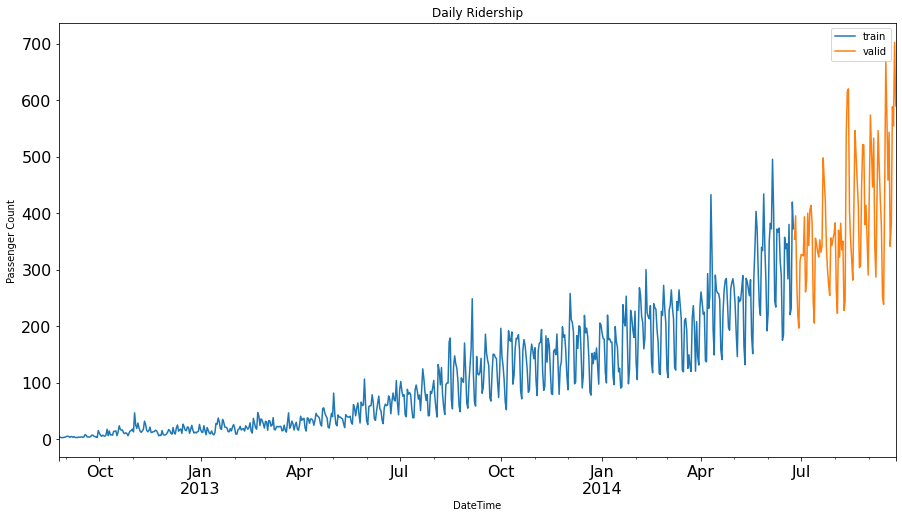

In [ ]:
Train.Count.plot(figsize=(15,8),title='Daily Ridership', label='train',fontsize=16)
valid.Count.plot(title='Daily Ridership' , label='valid')
plt.xlabel('DateTime')
plt.ylabel("Passenger Count")
plt.legend(loc='best')
plt.show()

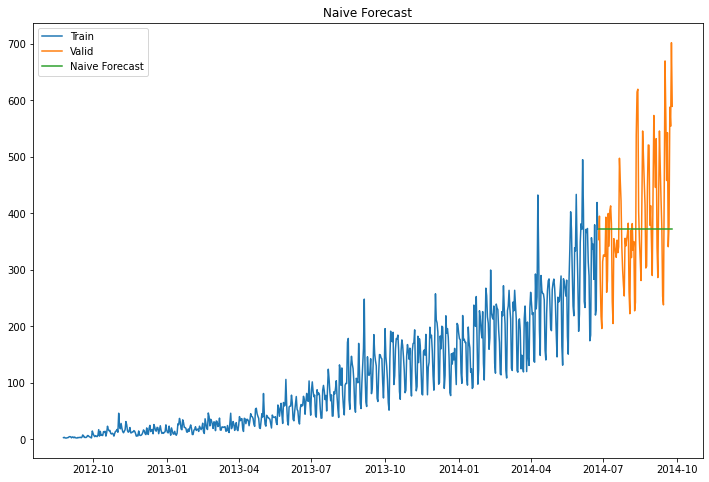

In [ ]:
dd= np.asarray(Train.Count) 
y_hat = valid.copy() 
y_hat['naive'] = dd[len(dd)-1] 
plt.figure(figsize=(12,8)) 
plt.plot(Train.index, Train['Count'], label='Train') 
plt.plot(valid.index,valid['Count'], label='Valid') 
plt.plot(y_hat.index,y_hat['naive'], label='Naive Forecast') 
plt.legend(loc='best') 
plt.title("Naive Forecast") 
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error 
from math import sqrt 
rms = sqrt(mean_squared_error(valid.Count, y_hat.naive)) 
print(rms)

111.79050467496724


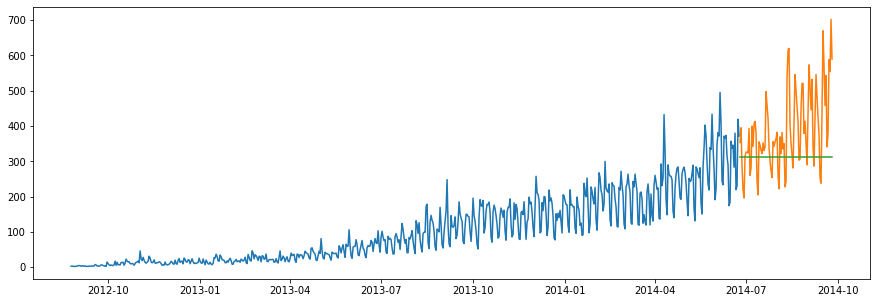

In [ ]:
y_hat_avg = valid.copy() 
y_hat_avg['moving_avg_forecast'] = Train['Count'].rolling(10).mean().iloc[-1] 
plt.figure(figsize=(15,5)) 
plt.plot(Train['Count'], label='Train') 
plt.plot(valid['Count'], label='Valid') 
plt.plot(y_hat_avg['moving_avg_forecast'], 
                label='Moving Average Forecast using 10 observations')

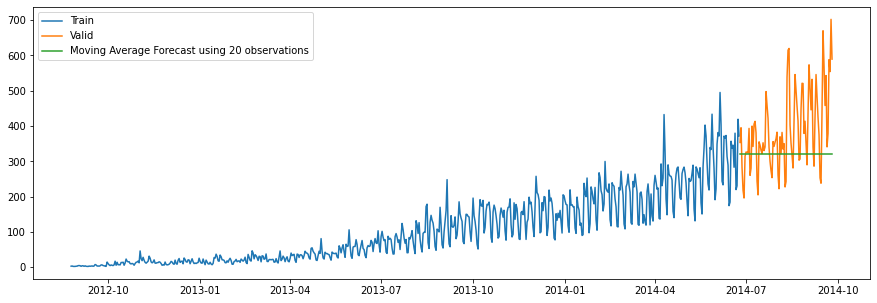

In [ ]:
y_hat_avg = valid.copy() 
y_hat_avg['moving_avg_forecast'] = Train['Count'].rolling(20).mean().iloc[-1] 
plt.figure(figsize=(15,5)) 
plt.plot(Train['Count'], label='Train') 
plt.plot(valid['Count'], label='Valid') 
plt.plot(y_hat_avg['moving_avg_forecast'], 
                label='Moving Average Forecast using 20 observations') 
plt.legend(loc='best') 
plt.show()

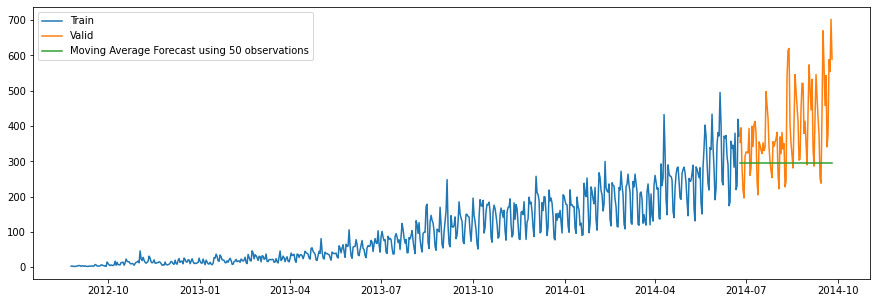

In [ ]:
y_hat_avg = valid.copy() 
y_hat_avg['moving_avg_forecast'] = Train['Count'].rolling(50).mean().iloc[-1] 
plt.figure(figsize=(15,5)) 
plt.plot(Train['Count'], label='Train') 
plt.plot(valid['Count'], label='Valid') 
plt.plot(y_hat_avg['moving_avg_forecast'], 
                    label='Moving Average Forecast using 50 observations') 
plt.legend(loc='best') 
plt.show()

In [ ]:
rms = sqrt(mean_squared_error(valid.Count, y_hat_avg.moving_avg_forecast)) 
print(rms)

144.19175679986793


In [ ]:
from statsmodels.tsa.api  import SimpleExpSmoothing, Holt

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [ ]:
y_hat_avg = valid.copy() 
fit2 = SimpleExpSmoothing(np.asarray(Train['Count'])).fit(smoothing_level=0.6,
        optimized=False) 
y_hat_avg['Holt_linear'] = fit2.forecast(len(valid))

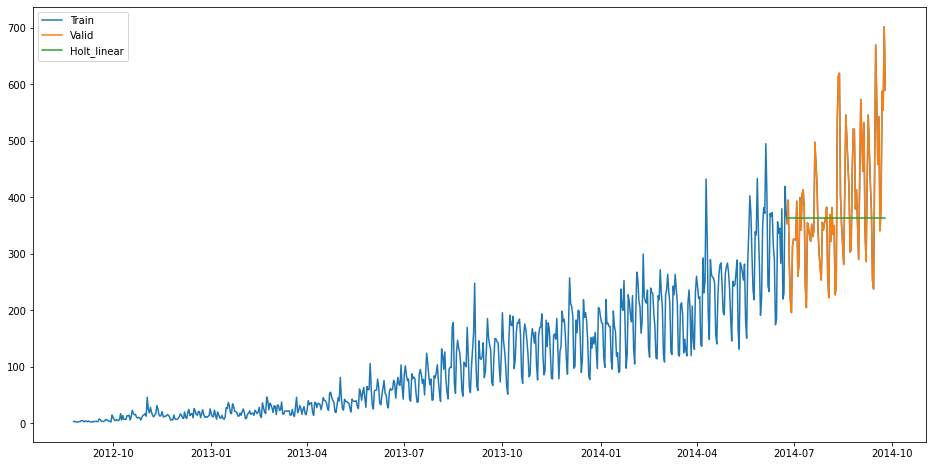

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(train['Count'], label='Train')
plt.plot(valid['Count'], label='Valid')
plt.plot(y_hat_avg['Holt_linear'], label='Holt_linear')
plt.legend(loc='best')
plt.show()

In [ ]:
rms = sqrt(mean_squared_error(valid.Count, y_hat_avg.Holt_linear)) 
print(rms)

113.43708111884514


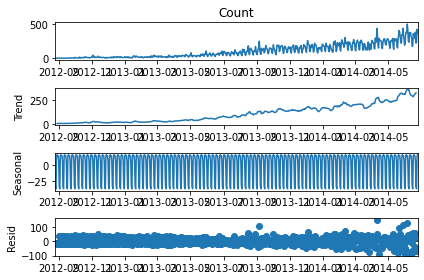

In [ ]:
import statsmodels.api as sm 
sm.tsa.seasonal_decompose(Train.Count).plot() 
result = sm.tsa.stattools.adfuller(train.Count) 
plt.show()